In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (20, 6)
plt.rcParams['figure.facecolor'] = '#00000000'
pd.pandas.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('GlobalLandTemperaturesByState.csv')

In [3]:
df.head()

dt  AverageTemperature  AverageTemperatureUncertainty State Country
0  1855-05-01              25.544                          1.171  Acre  Brazil
1  1855-06-01              24.228                          1.103  Acre  Brazil
2  1855-07-01              24.371                          1.044  Acre  Brazil
3  1855-08-01              25.427                          1.073  Acre  Brazil
4  1855-09-01              25.675                          1.014  Acre  Brazil

In [4]:
df.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'State',
       'Country'],
      dtype='object')

In [5]:
df.shape

(645675, 5)

In [6]:
df.isnull().sum()

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

In [7]:
df.describe()

AverageTemperature  AverageTemperatureUncertainty
count       620027.000000                  620027.000000
mean             8.993111                       1.287647
std             13.772150                       1.360392
min            -45.389000                       0.036000
25%             -0.693000                       0.316000
50%             11.199000                       0.656000
75%             19.899000                       1.850000
max             36.339000                      12.646000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645675 entries, 0 to 645674
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             645675 non-null  object 
 1   AverageTemperature             620027 non-null  float64
 2   AverageTemperatureUncertainty  620027 non-null  float64
 3   State                          645675 non-null  object 
 4   Country                        645675 non-null  object 
dtypes: float64(2), object(3)
memory usage: 24.6+ MB


## Preprocessing

In [9]:
df['Date'] = pd.to_datetime(df['dt'])

In [10]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [11]:
df.head()

dt  AverageTemperature  AverageTemperatureUncertainty State  \
0  1855-05-01              25.544                          1.171  Acre   
1  1855-06-01              24.228                          1.103  Acre   
2  1855-07-01              24.371                          1.044  Acre   
3  1855-08-01              25.427                          1.073  Acre   
4  1855-09-01              25.675                          1.014  Acre   

  Country       Date  Year  Month  
0  Brazil 1855-05-01  1855      5  
1  Brazil 1855-06-01  1855      6  
2  Brazil 1855-07-01  1855      7  
3  Brazil 1855-08-01  1855      8  
4  Brazil 1855-09-01  1855      9

In [12]:
df.set_index('Date', inplace=True)

In [13]:
df.head()

dt  AverageTemperature  AverageTemperatureUncertainty  \
Date                                                                        
1855-05-01  1855-05-01              25.544                          1.171   
1855-06-01  1855-06-01              24.228                          1.103   
1855-07-01  1855-07-01              24.371                          1.044   
1855-08-01  1855-08-01              25.427                          1.073   
1855-09-01  1855-09-01              25.675                          1.014   

           State Country  Year  Month  
Date                                   
1855-05-01  Acre  Brazil  1855      5  
1855-06-01  Acre  Brazil  1855      6  
1855-07-01  Acre  Brazil  1855      7  
1855-08-01  Acre  Brazil  1855      8  
1855-09-01  Acre  Brazil  1855      9

In [14]:
df.drop('dt', axis=1, inplace=True)

In [15]:
df.head()

AverageTemperature  AverageTemperatureUncertainty State Country  \
Date                                                                          
1855-05-01              25.544                          1.171  Acre  Brazil   
1855-06-01              24.228                          1.103  Acre  Brazil   
1855-07-01              24.371                          1.044  Acre  Brazil   
1855-08-01              25.427                          1.073  Acre  Brazil   
1855-09-01              25.675                          1.014  Acre  Brazil   

            Year  Month  
Date                     
1855-05-01  1855      5  
1855-06-01  1855      6  
1855-07-01  1855      7  
1855-08-01  1855      8  
1855-09-01  1855      9

In [16]:
df = df.interpolate('linear')

In [17]:
df.isnull().sum()

AverageTemperature               0
AverageTemperatureUncertainty    0
State                            0
Country                          0
Year                             0
Month                            0
dtype: int64

## EDA

In [18]:
df.head()

AverageTemperature  AverageTemperatureUncertainty State Country  \
Date                                                                          
1855-05-01              25.544                          1.171  Acre  Brazil   
1855-06-01              24.228                          1.103  Acre  Brazil   
1855-07-01              24.371                          1.044  Acre  Brazil   
1855-08-01              25.427                          1.073  Acre  Brazil   
1855-09-01              25.675                          1.014  Acre  Brazil   

            Year  Month  
Date                     
1855-05-01  1855      5  
1855-06-01  1855      6  
1855-07-01  1855      7  
1855-08-01  1855      8  
1855-09-01  1855      9

In [19]:
# df.plot('Averageztemperature')

<AxesSubplot:xlabel='Country'>

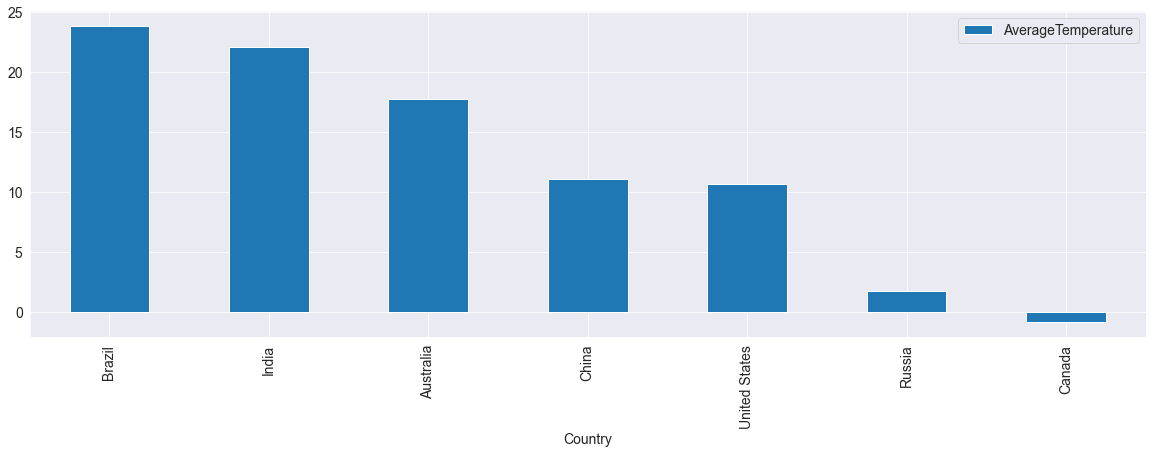

In [20]:
df.groupby(['Country'])['AverageTemperature','Country'].mean().sort_values(by='AverageTemperature',ascending= False).plot.bar()

In [21]:
# sns.lineplot(x='Year', y='AverageTemperature', data=df)

<AxesSubplot:xlabel='State'>

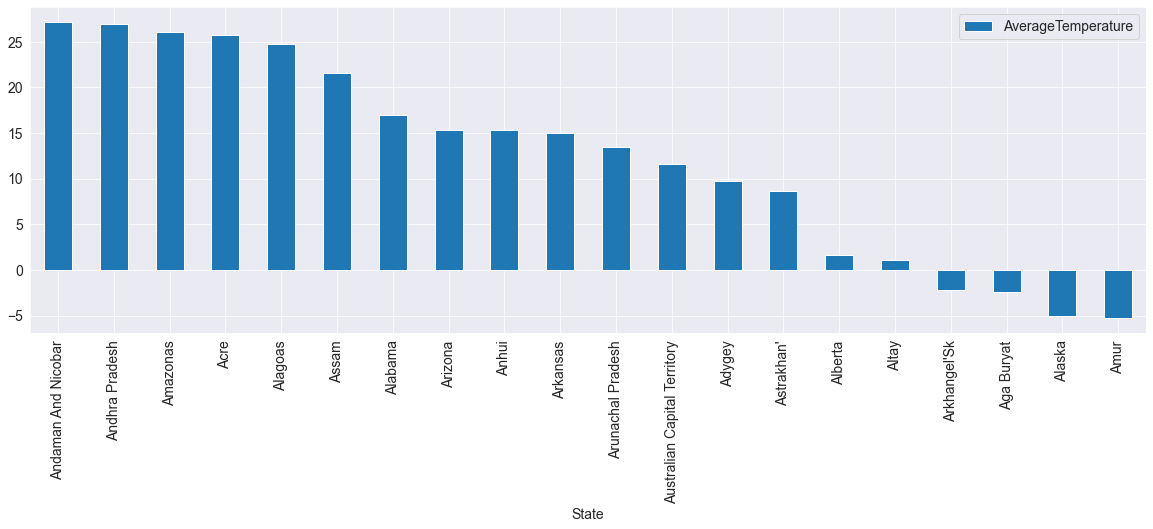

In [22]:
df.groupby(['State'])['AverageTemperature','State'].mean()[:20].sort_values(by='AverageTemperature',ascending= False).plot.bar()

<AxesSubplot:xlabel='Year'>

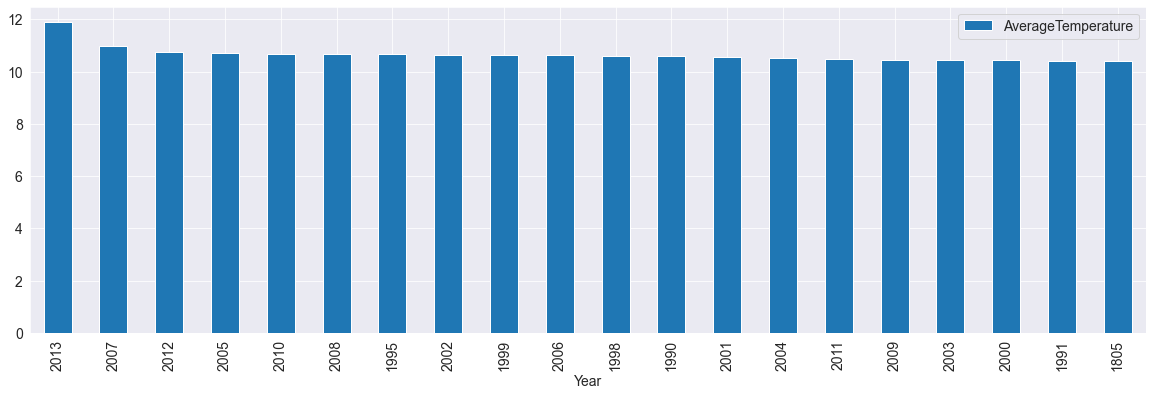

In [23]:
df[['Year', 'AverageTemperature']].groupby('Year').mean().sort_values(by='AverageTemperature', ascending=False)[:20].plot.bar()

<AxesSubplot:ylabel='Frequency'>

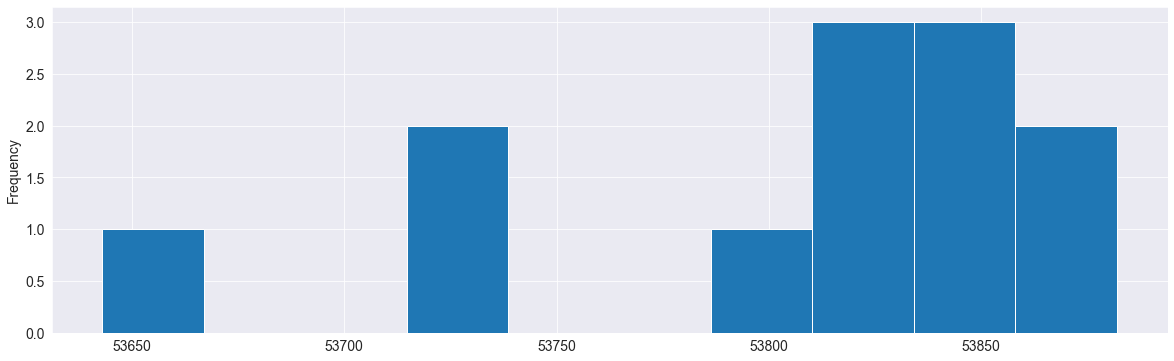

In [24]:
df[['Month','AverageTemperature']].groupby('Month').size().sort_values(ascending=False)[:20].plot.hist()

<AxesSubplot:xlabel='Month'>

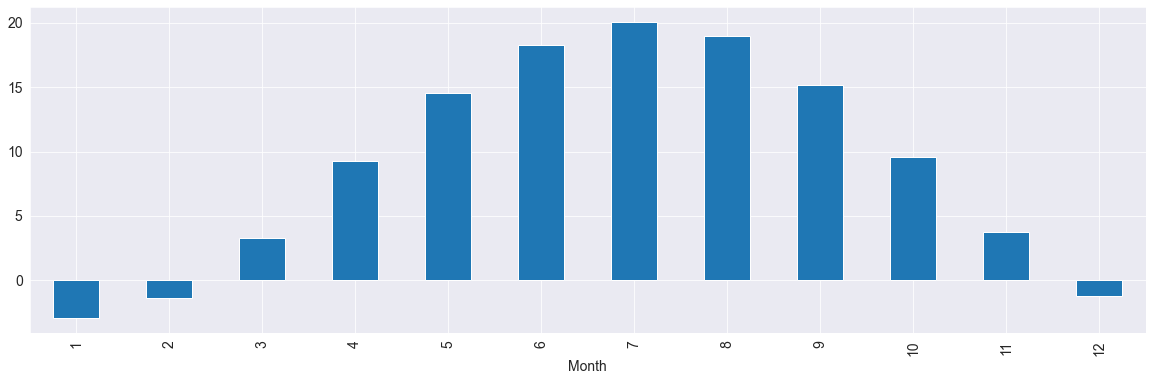

In [25]:
df.groupby('Month')['AverageTemperature'].mean().plot(kind='bar')

In [26]:
# sns.lineplot(x='AverageTemperature', data=df)

<AxesSubplot:xlabel='Country', ylabel='count'>

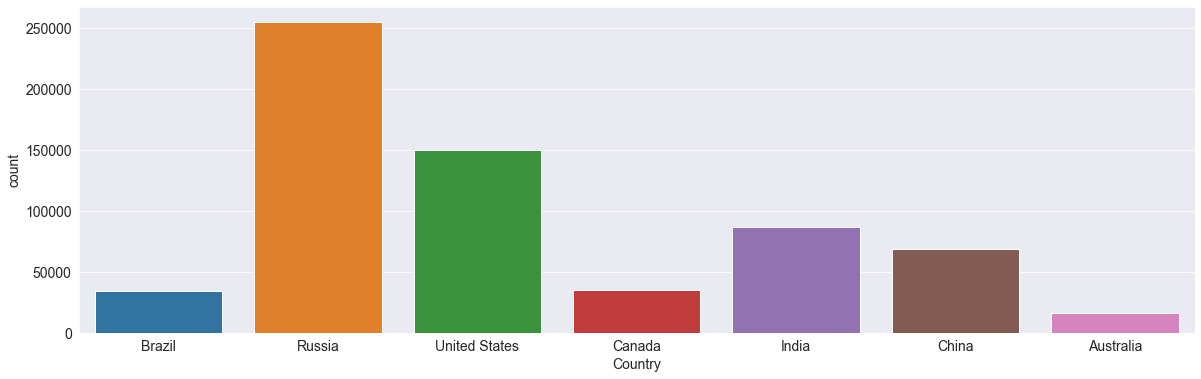

In [27]:
sns.countplot(x='Country', data= df)

In [28]:
df[df['Country']=='Russia'].head(50)

AverageTemperature  AverageTemperatureUncertainty   State Country  \
Date                                                                            
1743-11-01            4.537000                       2.943000  Adygey  Russia   
1743-12-01            6.007600                       2.955400  Adygey  Russia   
1744-01-01            7.478200                       2.967800  Adygey  Russia   
1744-02-01            8.948800                       2.980200  Adygey  Russia   
1744-03-01           10.419400                       2.992600  Adygey  Russia   
1744-04-01           11.890000                       3.005000  Adygey  Russia   
1744-05-01           13.252000                       2.920000  Adygey  Russia   
1744-06-01           18.127000                       2.928000  Adygey  Russia   
1744-07-01           20.885000                       2.907000  Adygey  Russia   
1744-08-01           18.319500                       2.912000  Adygey  Russia   
1744-09-01           15.754000                       2.917000  Adygey  Russia   
1744-10-01            8.754000                       2.937000  Adygey  Russia   
1744-11-01            5.388000                       2.896000  Adygey  Russia   
1744-12-01            0.739000                       2.949000  Adygey  Russia   
1745-01-01           -2.658000                       2.934000  Adygey  Russia   
1745-02-01           -0.991000                       2.898000  Adygey  Russia   
1745-03-01            2.021000                       2.876000  Adygey  Russia   
1745-04-01            8.915000                       2.875000  Adygey  Russia   
1745-05-01            8.758840                       2.876852  Adygey  Russia   
1745-06-01            8.602679                       2.878704  Adygey  Russia   
1745-07-01            8.446519                       2.880556  Adygey  Russia   
1745-08-01            8.290358                       2.882407  Adygey  Russia   
1745-09-01            8.134198                       2.884259  Adygey  Russia   
1745-10-01            7.978037                       2.886111  Adygey  Russia   
1745-11-01            7.821877                       2.887963  Adygey  Russia   
1745-12-01            7.665716                       2.889815  Adygey  Russia   
1746-01-01            7.509556                       2.891667  Adygey  Russia   
1746-02-01            7.353395                       2.893519  Adygey  Russia   
1746-03-01            7.197235                       2.895370  Adygey  Russia   
1746-04-01            7.041074                       2.897222  Adygey  Russia   
1746-05-01            6.884914                       2.899074  Adygey  Russia   
1746-06-01            6.728753                       2.900926  Adygey  Russia   
1746-07-01            6.572593                       2.902778  Adygey  Russia   
1746-08-01            6.416432                       2.904630  Adygey  Russia   
1746-09-01            6.260272                       2.906481  Adygey  Russia   
1746-10-01            6.104111                       2.908333  Adygey  Russia   
1746-11-01            5.947951                       2.910185  Adygey  Russia   
1746-12-01            5.791790                       2.912037  Adygey  Russia   
1747-01-01            5.635630                       2.913889  Adygey  Russia   
1747-02-01            5.479469                       2.915741  Adygey  Russia   
1747-03-01            5.323309                       2.917593  Adygey  Russia   
1747-04-01            5.167148                       2.919444  Adygey  Russia   
1747-05-01            5.010988                       2.921296  Adygey  Russia   
1747-06-01            4.854827                       2.923148  Adygey  Russia   
1747-07-01            4.698667                       2.925000  Adygey  Russia   
1747-08-01            4.542506                       2.926852  Adygey  Russia   
1747-09-01            4.386346                       2.928704  Adygey  Russia   
1747-10-01            4.230185             

## Time-Series Analysis

<AxesSubplot:xlabel='Year'>

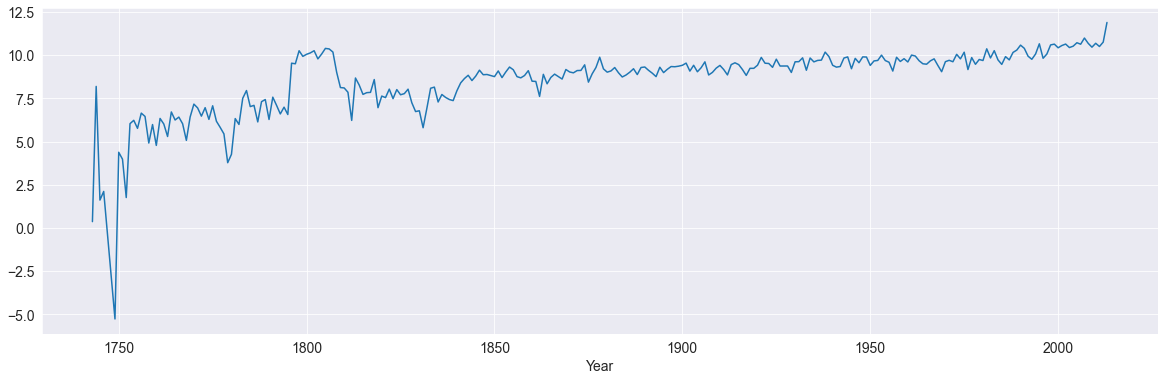

In [29]:
df.groupby('Year')['AverageTemperature'].mean().plot()

In [30]:
df1 = df['AverageTemperature']

In [31]:
df1

Date
1855-05-01    25.544
1855-06-01    24.228
1855-07-01    24.371
1855-08-01    25.427
1855-09-01    25.675
               ...  
2013-05-01    21.634
2013-06-01    24.679
2013-07-01    29.272
2013-08-01    29.202
2013-09-01    29.202
Name: AverageTemperature, Length: 645675, dtype: float64

<AxesSubplot:xlabel='Date'>

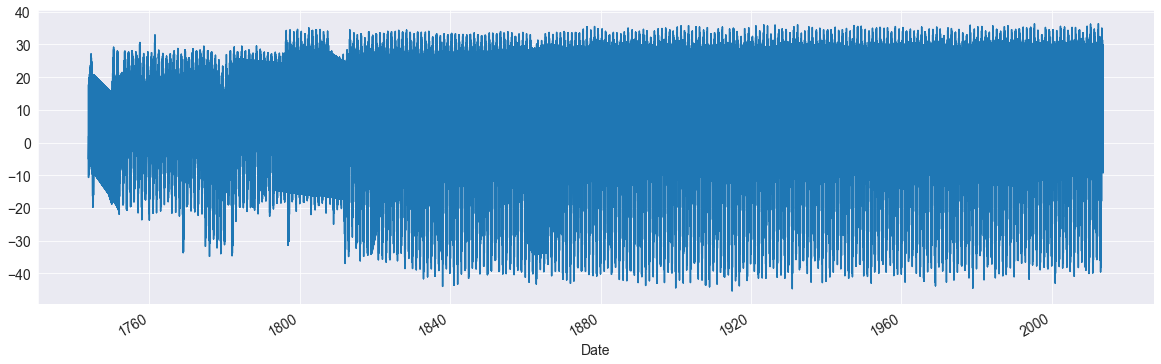

In [32]:
df1.plot()

In [33]:
ts_resample = df1.resample(rule = 'A').mean()

<AxesSubplot:xlabel='Date'>

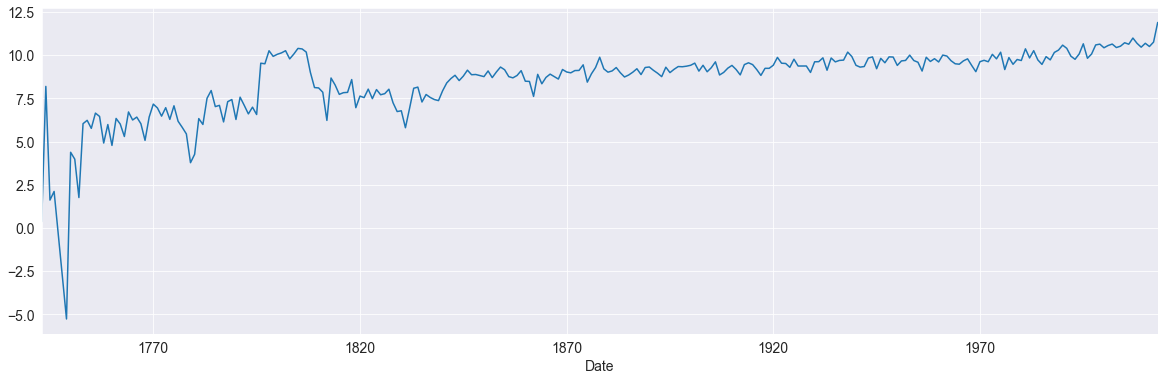

In [34]:
ts_resample.plot()

#### Dickey Fuller test to check for stationarity

In [35]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(ts_resample, autolag = 'AIC')

print('P-value: ', adf_result[1])
print('ADF statistics: ', adf_result[0])
print('No: of lags: ', adf_result[2])
print('Critical values: ')
for key, value in adf_result[4].items():
    print('\t', key,': ', value)

P-value:  0.045110003327378925
ADF statistics:  -2.9020510869590628
No: of lags:  10
Critical values: 
	 1% :  -3.4557539868570775
	 5% :  -2.8727214497041422
	 10% :  -2.572728476331361


p-value is less than 0.05. So, data is stationary.

#### Seasonal Decompose

In [36]:
import statsmodels.api as sm

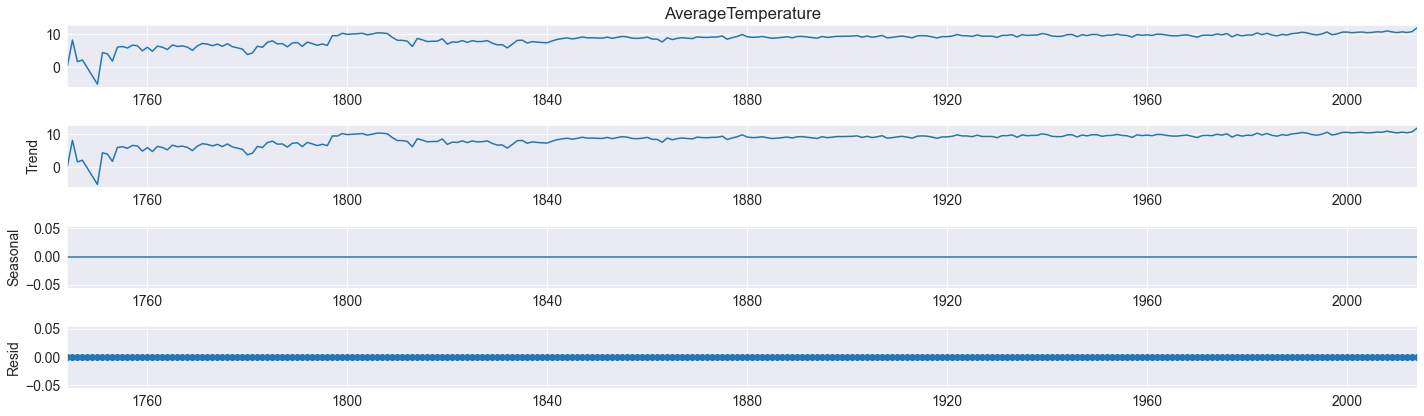

In [37]:
result = sm.tsa.seasonal_decompose(x=ts_resample, model = 'additive', extrapolate_trend='freq')
result.plot().suptitle('')
plt.show()

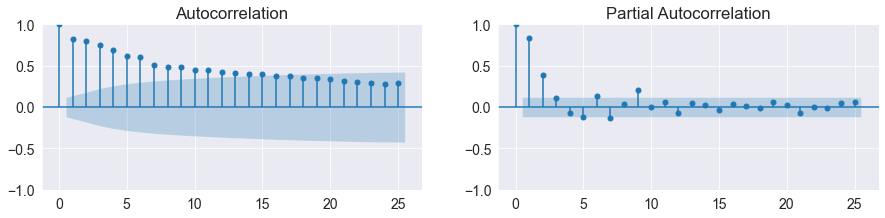

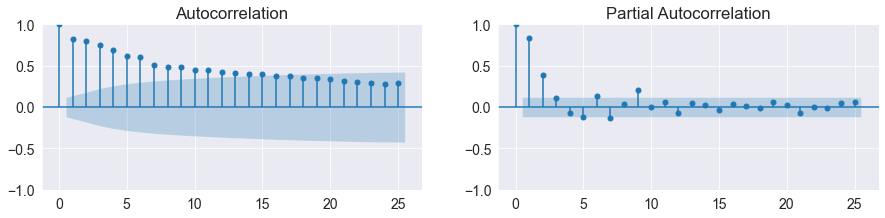

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize = (15, 14))
plt.subplot(421); 
plot_acf(ts_resample, lags = 25, ax = plt.gca())
plt.subplot(422); 
plot_pacf(ts_resample, lags = 25, ax = plt.gca())

## Model Trainning

In [64]:
train_length = int(len(df1) * 0.85)

In [65]:
train = df1[:train_length]
test = df1[train_length:]
train.shape, test.shape

((548823,), (96852,))

In [66]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [168]:
model = sm.tsa.arima.ARIMA(train, order = (0,2,3)).fit()

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packa

In [169]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     AverageTemperature   No. Observations:               548823
Model:                 ARIMA(0, 2, 3)   Log Likelihood            -1545041.226
Date:                Sat, 15 Oct 2022   AIC                        3090090.451
Time:                        08:56:22   BIC                        3090135.313
Sample:                             0   HQIC                       3090103.102
                             - 548823                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4436      0.001   -307.853      0.000      -0.446      -0.441
ma.L2         -0.1477      0.001   -113.203      0.000      -0.150      -0.145
ma.L3         -0.4087      0.001   -320.290      0.000      -0.411      -0.406
sigma2        16.3217      0.032    508.148      0.000      16.259      16.385
===================================================================================
Ljung-Box (L1) (Q):                6698.25   Jarque-Bera (JB):             54187.82
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                             0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [170]:
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start=start, end=end)

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


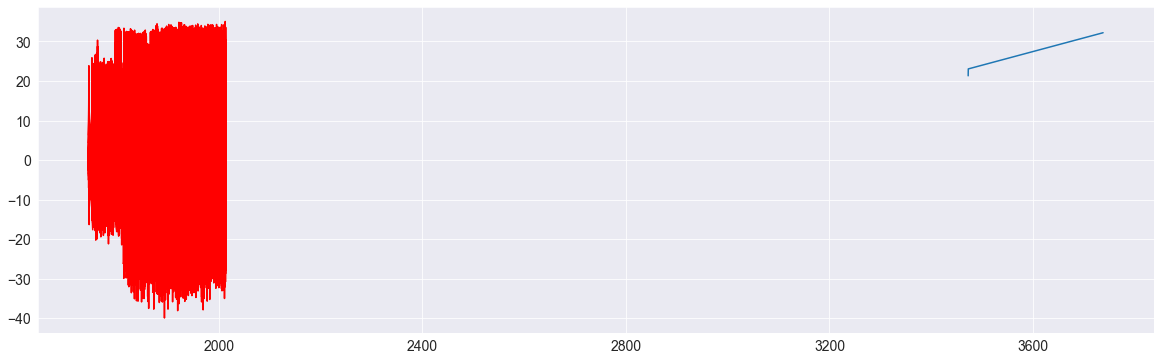

In [171]:
plt.plot(pred)
plt.plot(test, color ='red')
plt.show()

In [172]:
import math
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test,pred))

In [173]:
rmse

24.574967799931002

In [151]:
df1.mean()

8.953560992759387

##  Predictions for next 20 years

In [90]:
df.tail()

AverageTemperature  AverageTemperatureUncertainty     State  \
Date                                                                      
2013-05-01              21.634                          0.578  Zhejiang   
2013-06-01              24.679                          0.596  Zhejiang   
2013-07-01              29.272                          1.340  Zhejiang   
2013-08-01              29.202                          0.869  Zhejiang   
2013-09-01              29.202                          0.869  Zhejiang   

           Country  Year  Month  
Date                             
2013-05-01   China  2013      5  
2013-06-01   China  2013      6  
2013-07-01   China  2013      7  
2013-08-01   China  2013      8  
2013-09-01   China  2013      9

In [133]:
index_future_dates = pd.date_range(start ='2013-09-01', end = '2034-09-01' )

In [135]:
pred = model.predict(start=len(df), end=len(df)+7670, type='levels')
pred.index = index_future_dates

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [136]:
pred.index = index_future_dates

In [137]:
pred

2013-09-01    32.204483
2013-09-02    32.204577
2013-09-03    32.204672
2013-09-04    32.204766
2013-09-05    32.204861
                ...    
2034-08-28    32.929078
2034-08-29    32.929172
2034-08-30    32.929267
2034-08-31    32.929361
2034-09-01    32.929456
Freq: D, Name: predicted_mean, Length: 7671, dtype: float64

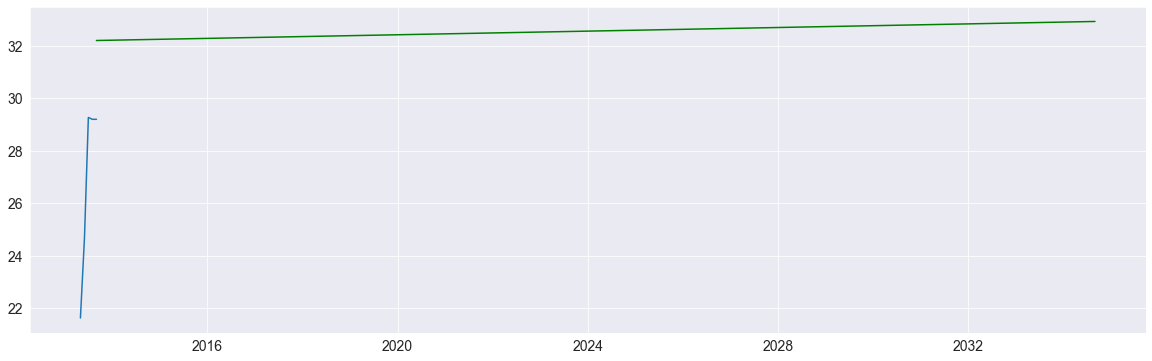

In [138]:
plt.plot(df1.tail())
plt.plot(pred, color='green')
plt.show()